## Building Word2Vec model

### Load Gensim Library

In [1]:
import gensim

Example text

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'], 
             ['this', 'is', 'the', 'second', 'sentence'], 
             ['yet', 'another', 'sentence'], 
             ['one', 'more', 'sentence'], 
             ['and', 'the', 'final', 'sentence']]

In [45]:
# train model
model = Word2Vec(sentences, min_count=1)

In [46]:
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [47]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [48]:
# access vector for one word
print(model.wv.word_vec('sentence'))

[-1.8163706e-04  2.8151902e-03 -4.0430184e-03  4.5586200e-03
 -9.6109441e-05 -2.7914704e-03  2.0515486e-03  3.5308616e-03
 -2.5904484e-03  2.1422505e-03  2.5270437e-03  6.8969821e-04
  3.2835144e-03 -2.6631854e-03 -3.8498947e-03  1.6855812e-03
 -3.5759099e-03  3.3392604e-03 -4.6539451e-03  2.1219924e-03
 -4.8686904e-03 -4.7202581e-03 -2.5472192e-03  3.6825592e-04
 -1.7845040e-03  3.2774203e-03 -1.3261018e-03  1.5705308e-03
  2.0605084e-03  2.5921012e-03  2.0706267e-03 -5.1088369e-04
  3.2500371e-03  2.4303424e-04  4.8714774e-03  4.3945943e-04
 -3.5572345e-03  7.6966925e-04  3.9976286e-03  3.8072788e-03
  2.4789260e-03  7.0605421e-04 -4.9717845e-03 -1.9823073e-03
 -2.8952563e-03 -4.4882847e-03  1.2302322e-03 -4.4047465e-03
  6.1034248e-04 -2.0707757e-03 -6.7740586e-04  6.3182937e-04
 -1.4504662e-04  2.5152322e-03 -4.5392308e-03 -4.6771718e-03
  2.9089286e-03  2.3872850e-03 -3.1097010e-03  6.2324863e-04
 -6.7716016e-04  3.1906842e-05 -1.4048539e-03 -1.0524305e-03
 -6.7111413e-04 -1.61091

In [49]:
model.wv.most_similar('first', topn=5)

[('yet', 0.15105977654457092),
 ('the', 0.1153249517083168),
 ('word2vec', 0.04173220694065094),
 ('is', 0.031835511326789856),
 ('more', 0.014091253280639648)]

In [56]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


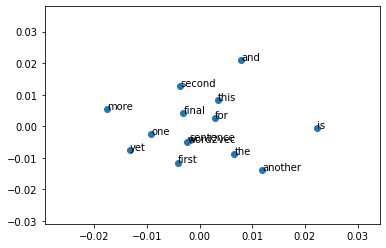

In [57]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Load Text Data

Data can be downloaded from https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('labeledTrainData.tsv.zip', header=0, delimiter="\t", quoting=3)

In [13]:
print('Number of examples in Dataset: ', df.shape)
df.head()

Number of examples in Dataset:  (25000, 3)


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


### Function to Clean up data

In [14]:
import re, string

In [15]:
def clean_str(string):
  """
  String cleaning before vectorization
  
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)	
  except:
    return ""

### Clean the Data using routine above

In [16]:
df['clean_review'] = df['review'].apply(clean_str)
df.head()

,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",with all this stuff going down at the moment w...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",the classic war of the worlds by timothy hines...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",the film starts with a manager nicholas bell g...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",it must be assumed that those who praised this...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy and wondrously unpretentious s...


In [17]:
df.head()

,id,sentiment,review,clean_review
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",with all this stuff going down at the moment w...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",the classic war of the worlds by timothy hines...
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",the film starts with a manager nicholas bell g...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",it must be assumed that those who praised this...
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbly trashy and wondrously unpretentious s...


### Convert Review to a Word List

In [18]:
#List to hold all words in each review
documents = []

#Iterate over each review
for doc in df['clean_review']:
    documents.append(doc.split(' '))

print(len(documents))
print(documents[0])

25000
['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'br', 'br', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is'

In [19]:
len(documents[108])

376

### Build the Model

In [20]:
#Build the model
model = gensim.models.Word2Vec(documents, #Word list
                               min_count=10, #Ignore all words with total frequency lower than this                           
                               workers=4, #Number of CPU Cores
                               size=50,  #Embedding size
                               window=5, #Maximum Distance between current and predicted word
                               iter=10   #Number of iterations over the text corpus
                              )  

# Exploring the model

### How many words in the model

In [42]:
#Model size
model.vectors.shape

(400000, 100)

In [22]:
# Vocablury of the model
model.wv.vocab.keys()

dict_keys(['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'wiz', 'moonwalker', 'again', 'maybe', 'just', 'want', 'get', 'a', 'certain', 'insight', 'into', 'guy', 'who', 'thought', 'was', 'really', 'cool', 'in', 'eighties', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'part', 'biography', 'feature', 'film', 'which', 'remember', 'see', 'cinema', 'when', 'it', 'originally', 'released', 'some', 'of', 'has', 'subtle', 'messages', 'about', 's', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'are', 'bad', 'm', 'kay', 'br', 'visually', 'impressive', 'but', 'course', 'michael', 'jackson', 'so', 'unless', 'you', 'remotely', 'like', 'anyway', 'then', 'hate', 'find', 'boring', 'may', 'call', 'an', 'for', 'making', 'movie', 'most', 'fans', 'would', 'say', 'that', 'made', 'if', 'true', 'ni

### Get an embedding for a word

In [23]:
model.wv['flower']

array([ 0.65521926, -0.33946794, -0.14350082, -0.634421  , -0.7914232 ,
        0.12546858,  0.0080882 ,  0.33997425,  1.2782204 , -0.08007827,
       -0.03152077,  0.05749049,  0.71559715,  0.05394096,  0.6768192 ,
        0.06091197,  0.8467024 ,  0.01683363,  0.4251767 ,  0.17281948,
        0.5447715 , -0.76489645,  0.01640845,  0.23544204,  0.00641322,
       -0.09441009, -0.31972805, -0.08833376,  0.27935508,  0.12396055,
       -0.07548261, -0.07366537, -0.32047287,  0.8005402 ,  0.1882368 ,
       -0.0365868 ,  0.31988543, -0.7193889 , -0.95627147,  0.39304858,
       -0.55290246,  0.3521277 , -0.35375986, -0.26700786, -0.24034119,
       -0.4339068 , -0.40809497, -0.00515699, -0.04312487, -0.24714492],
      dtype=float32)

### Finding Words which have similar meaning

In [24]:
model.wv.most_similar(['great'], topn=5)

[('wonderful', 0.8544347286224365),
 ('fantastic', 0.8495597839355469),
 ('fine', 0.8366948962211609),
 ('good', 0.8205729722976685),
 ('brilliant', 0.7831134796142578)]

### Find the word which is not like others

In [39]:
model.doesnt_match("man woman child kitchen".split())

'kitchen'

### Saving the model

In [26]:
model.save('word2vec-movie-50')

In [27]:
#Load model from memory
model = gensim.models.Word2Vec.load('word2vec-movie-50')

1. Equation king + woman = man + ?
2. In this case there may not be enough data for this equation

In [35]:
model.most_similar(positive=['king','woman'], negative=['man'], topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520533561706543)]

## Get word vectors from Stanford University GloVe library

In [29]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [30]:
from zipfile import ZipFile

with ZipFile('glove6b100dtxt.zip', 'r') as z:
  z.extractall()

In [31]:
# convert glove to word2vec format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [32]:
# load the converted model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [33]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
